In [387]:
import networkx as nx
import numpy as np
from community import community_louvain as cm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyvis.network import Network

In [388]:
p1 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD1_NET.csv", index_col=0)
p2 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD2_NET.csv", index_col=0)
p3 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD3_NET.csv", index_col=0)
p4_5 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD4_5_NET.csv", index_col=0)
p6 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD6_NET.csv", index_col=0)

G1 = nx.from_pandas_adjacency(p1)
G2 = nx.from_pandas_adjacency(p2)
G3 = nx.from_pandas_adjacency(p3)
G4_5 = nx.from_pandas_adjacency(p4_5)
G6 = nx.from_pandas_adjacency(p6)

G = [G1, G2, G3, G4_5, G6]

In [389]:
# giant components
G1_giant = G1.subgraph(sorted(nx.connected_components(G1), key=len, reverse=True)[0])
G2_giant = G2.subgraph(sorted(nx.connected_components(G2), key=len, reverse=True)[0])
G3_giant = G3.subgraph(sorted(nx.connected_components(G3), key=len, reverse=True)[0])
G4_5_giant = G4_5.subgraph(sorted(nx.connected_components(G4_5), key=len, reverse=True)[0])
G6_giant = G6.subgraph(sorted(nx.connected_components(G6), key=len, reverse=True)[0])

G_giant = [G1_giant, G2_giant, G3_giant, G4_5_giant, G6_giant]

In [390]:
print('Period 1: ' + nx.info(G1))
print('Period 2: ' + nx.info(G2))
print('Period 3: ' + nx.info(G3))
print('Period 4_5: ' + nx.info(G4_5))
print('Period 6: ' + nx.info(G6))

Period 1: Name: 
Type: Graph
Number of nodes: 334
Number of edges: 405
Average degree:   2.4251
Period 2: Name: 
Type: Graph
Number of nodes: 260
Number of edges: 340
Average degree:   2.6154
Period 3: Name: 
Type: Graph
Number of nodes: 526
Number of edges: 1025
Average degree:   3.8973
Period 4_5: Name: 
Type: Graph
Number of nodes: 367
Number of edges: 514
Average degree:   2.8011
Period 6: Name: 
Type: Graph
Number of nodes: 83
Number of edges: 92
Average degree:   2.2169


In [391]:
# pyvis
# nt = Network("500px", "500px")
# populates the nodes and edges data structures
# nt.from_nx(G1)
# nt.show("nx.html")

In [392]:
df = pd.DataFrame(['G1', 'G2', 'G3', 'G4_5', 'G6'], columns=['graph'])

# Number of nodes

<AxesSubplot:xlabel='graph', ylabel='number_of_nodes'>

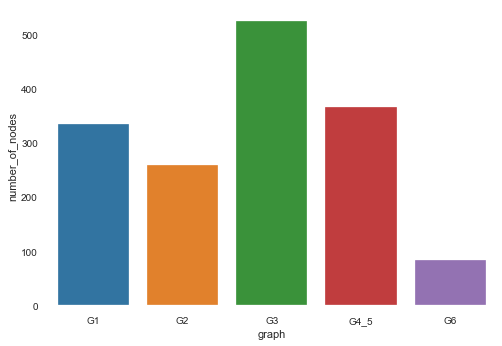

In [393]:
number_of_nodes = []
for i in G:
    number_of_nodes.append(nx.number_of_nodes(i))

df['number_of_nodes'] = number_of_nodes
sns.barplot(data = df, x = 'graph', y = 'number_of_nodes')

# Number of edges

<AxesSubplot:xlabel='graph', ylabel='number_of_edges'>

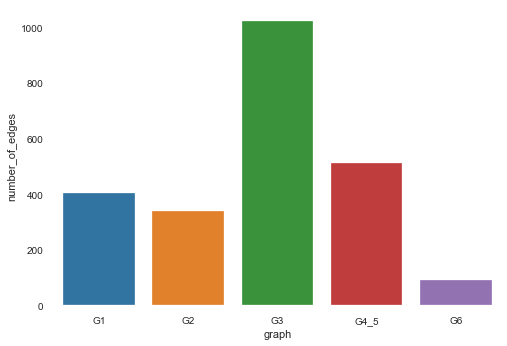

In [394]:
number_of_edges = []
for i in G:
    number_of_edges.append(nx.number_of_edges(i))

df['number_of_edges'] = number_of_edges
sns.barplot(data = df, x = 'graph', y = 'number_of_edges')

# Clustering coefficient

<AxesSubplot:xlabel='graph', ylabel='average_clustering'>

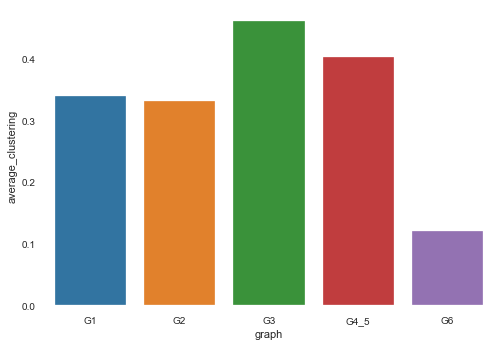

In [395]:
average_clustering = []
for i in G:
    average_clustering.append(nx.average_clustering(i))

df['average_clustering'] = average_clustering
sns.barplot(data = df, x = 'graph', y = 'average_clustering')

# Average shortest path

<AxesSubplot:xlabel='graph', ylabel='average_shortest_path_length'>

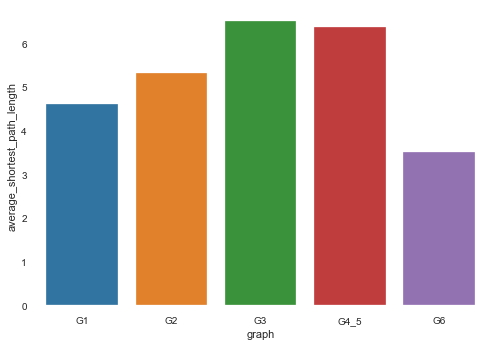

In [396]:
average_shortest_path_length = []
for i in G_giant:
    average_shortest_path_length.append(nx.average_shortest_path_length(i))

df['average_shortest_path_length'] = average_shortest_path_length
sns.barplot(data = df, x = 'graph', y = 'average_shortest_path_length')

# Modularity

<AxesSubplot:xlabel='graph', ylabel='modularity'>

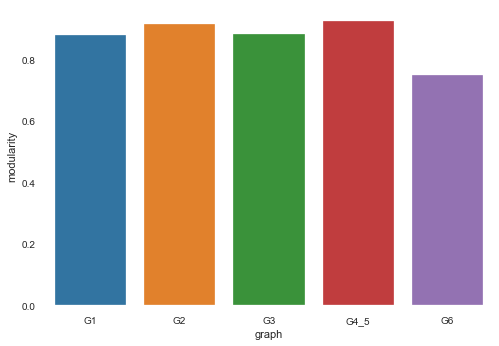

In [397]:
best_partition = []
modularity = []
for i in G:
    part = cm.best_partition(i)
    best_partition.append(part)
    mod = cm.modularity(part,i)
    modularity.append(mod)
    
df['best_partition'] = best_partition
df['modularity'] = modularity
sns.barplot(data = df, x = 'graph', y = 'modularity')

# Density

<AxesSubplot:xlabel='graph', ylabel='density'>

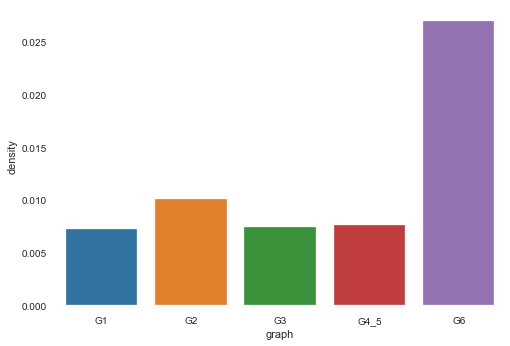

In [398]:
density = []
for i in G:
    density.append(nx.density(i))

df['density'] = density
sns.barplot(data = df, x = 'graph', y = 'density')

# Diameter

<AxesSubplot:xlabel='graph', ylabel='diameter'>

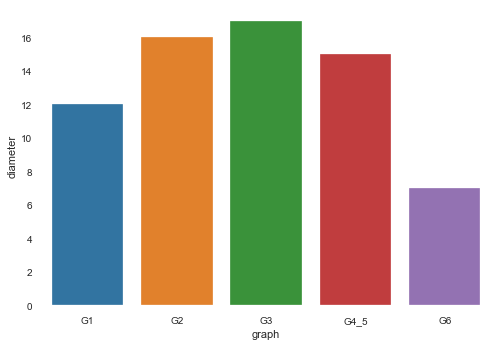

In [399]:
diameter = []
for i in G_giant:
    diameter.append(nx.diameter(i))

df['diameter'] = diameter
sns.barplot(data = df, x = 'graph', y = 'diameter')

# Efficiency

### The efficiency of a pair of nodes in a graph is the multiplicative inverse of the shortest path distance between the nodes. The average global efficiency of a graph is the average efficiency of all pairs of nodes. 

<AxesSubplot:xlabel='graph', ylabel='global_efficiency'>

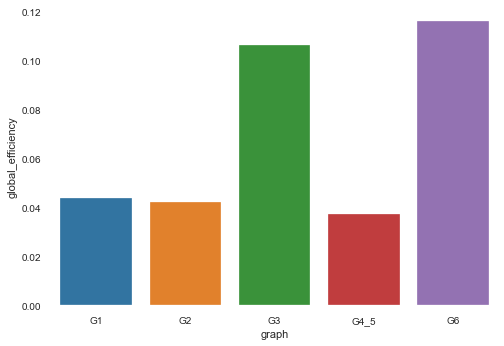

In [400]:
global_efficiency = []
for i in G:
    global_efficiency.append(nx.global_efficiency(i))

df['global_efficiency'] = global_efficiency
sns.barplot(data = df, x = 'graph', y = 'global_efficiency')

# Average degree

<AxesSubplot:xlabel='graph', ylabel='average_degree'>

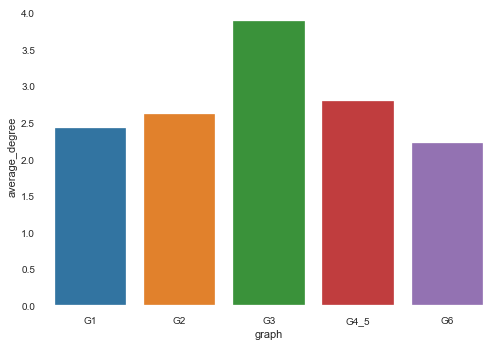

In [401]:
average_degree = []
for i in G:
    average_degree.append(sum([d for (n, d) in nx.degree(i)]) / float(i.number_of_nodes()))

df['average_degree'] = average_degree
sns.barplot(data = df, x = 'graph', y = 'average_degree')

# Degree Assortativity

<AxesSubplot:xlabel='graph', ylabel='degree_assortativity_coefficient'>

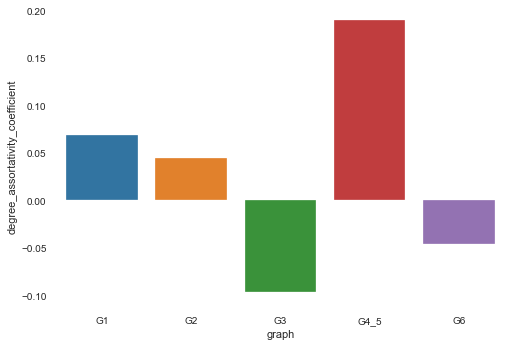

In [402]:
degree_assortativity_coefficient = []
for i in G:
    degree_assortativity_coefficient.append(nx.degree_assortativity_coefficient(i))

df['degree_assortativity_coefficient'] = degree_assortativity_coefficient
sns.barplot(data = df, x = 'graph', y = 'degree_assortativity_coefficient')

# Rich Club Coefficient
## Not sure what's going on here...

In [403]:
rich_club_coefficient = []
for i in G:
    rich_club_coefficient.append(nx.rich_club_coefficient(i))

df['rich_club_coefficient'] = rich_club_coefficient
sns.barplot(data = df, x = 'graph', y = 'rich_club_coefficient')

ZeroDivisionError: float division by zero

# Small-World Coefficient (sigma)
## WARNING: TAKES AGES TO RUN, DO NOT RUN THIS AGAIN!!
### Apparently this is a poor measure as it is heavily dependant on network size.

In [404]:
#sigma = []
#for i in G_giant:
#    sigma.append(nx.sigma(i))
#
#df['sigma'] = sigma
#sns.barplot(data = df, x = 'graph', y = 'sigma')

# Small-World Coefficient (omega)
## WARNING: TAKES AGES TO RUN, DO NOT RUN THIS AGAIN!!

In [405]:
#omega = []
#for i in G_giant:
#    omega.append(nx.omega(i))
#
#df['omega'] = omega
#sns.barplot(data = df, x = 'graph', y = 'omega')

# Degree distribution 

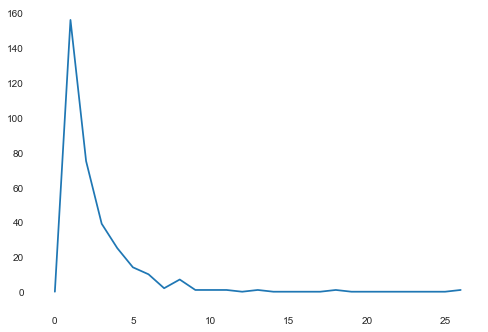

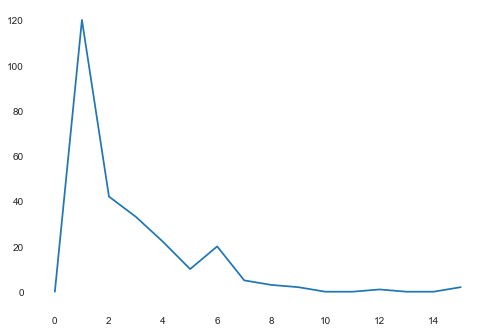

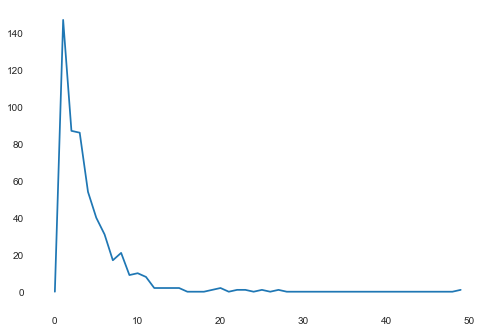

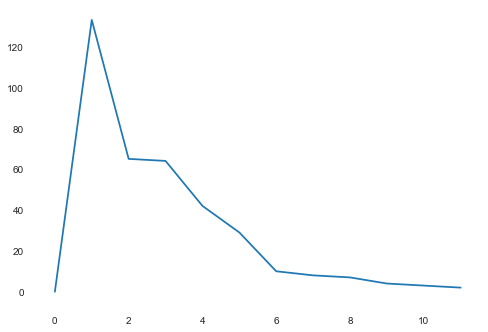

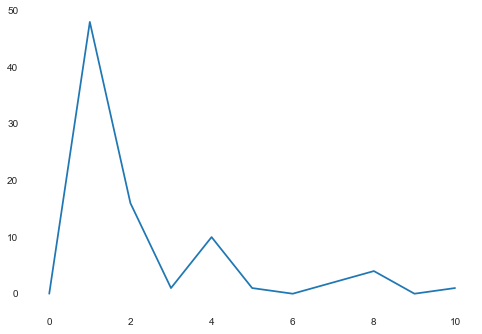

In [406]:
degree_distribution = []
for i in G:
    degree_distribution.append(nx.degree_histogram(i))

df['degree_distribution'] = degree_distribution

for i in df['degree_distribution']:
    plt.figure()
    plt.plot(i)

# Node Attributes

In [498]:
q1 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD1_ATTT.csv").rename(columns = {'Unnamed: 0':'node'})
q2 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD2_ATT.csv").rename(columns = {'Unnamed: 0':'node'})
q3 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD3_ATT.csv").rename(columns = {'Unnamed: 0':'node'})
q4_5 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD4_5_ATT.csv").rename(columns = {'Unnamed: 0':'node'})
q6 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD6_ATT.csv").rename(columns = {'Unnamed: 0':'node'})

In [499]:
atts = [q1, q2, q3, q4_5, q6]

In [500]:
def drop_prefix(self, prefix):
    self.columns = self.columns.str.lstrip(prefix)
    return self

pd.core.frame.DataFrame.drop_prefix = drop_prefix

for index, df in enumerate(atts):
    if index + 1 == 4:
        df.drop_prefix('Period4-5')
    elif index + 1 == 5:
        df.drop_prefix('Period6')
    else:
        df.drop_prefix('Period' + str(index + 1))

In [501]:
for period, value in enumerate(atts):
    atts[period]['period'] = '4_5' if period == 3 else '6' if period == 4 else str(period + 1)

In [502]:
from functools import reduce
node_attributes_from_file = reduce(lambda left, right: pd.merge(left, right, how='outer'), atts)

In [503]:
node_attributes = pd.DataFrame()

for period, graph in enumerate(G):
    new_attributes = pd.DataFrame()
    
    new_attributes['node'] = list(nx.nodes(graph))
    new_attributes['period'] = '4_5' if period == 3 else '6' if period == 4 else str(period + 1)
    new_attributes['degree'] = [j for i, j in list(nx.degree(graph))]
    new_attributes['degree_centrality'] = [j for i, j in nx.degree_centrality(graph).items()]
    new_attributes['closeness_centrality'] = [j for i, j in nx.closeness_centrality(graph).items()]
    new_attributes['betweenness_centrality'] = [j for i, j in nx.betweenness_centrality(graph).items()]
    new_attributes['neighbours'] = [list(nx.neighbors(graph, i)) for i in new_attributes['node']]
    
    node_attributes = node_attributes.append(new_attributes, ignore_index=True, sort=False)

In [504]:
node_attributes = pd.merge(node_attributes_from_file, node_attributes, how = 'inner', on = ['node', 'period'])

### Data Set ready as raw input into predictive model 

# Prediction of Period from node attributes

## Step 1: Data Cleansing

In [505]:
node_attributes = node_attributes.replace({99999: np.nan})
node_attributes = node_attributes.replace({99999.0: np.nan})

In [506]:
from pandas_profiling import ProfileReport
profile = ProfileReport(node_attributes)

In [509]:
profile.to_notebook_iframe()

In [508]:
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    f1_score,
    make_scorer,
    precision_recall_fscore_support,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

Using TensorFlow backend.


In [532]:
final = node_attributes.drop(columns=['neighbours']).dropna()
le = LabelEncoder()
final["node"] = le.fit_transform(final["node"])
final["period"] = le.fit_transform(final["period"])

### Train-Test Split

In [533]:
df_train, df_test = train_test_split(final, train_size=0.7, random_state=48)

df_train_X = df_train.drop("period", axis=1)
min_max_scaler = MinMaxScaler().fit(df_train_X)  # used to normalise later
df_train_Y = df_train["period"]

df_test_X = df_test.drop("period", axis=1)
df_test_Y = df_test["period"]

In [534]:
len(df_train_Y)

333

In [535]:
train_counts = df_train_Y.value_counts()
train_counts.index = le.inverse_transform(train_counts.index)
train_counts

2    155
3     83
1     70
4     25
Name: period, dtype: int64

In [536]:
len(df_test_Y)

144

In [537]:
test_counts = df_test_Y.value_counts()
test_counts.index = le.inverse_transform(test_counts.index)
test_counts

2    68
3    38
1    27
4    11
Name: period, dtype: int64

### Define the Models

In [541]:
scoring = {
    "accuracy": "accuracy",
    "weighted_precision": make_scorer(precision_score, average="weighted"),
    "weighted_recall": make_scorer(recall_score, average="weighted"),
    "weighted_F1": make_scorer(f1_score, average="weighted"),
}

classifiers = [
    (
        "DT",
        DecisionTreeClassifier(),
        {"max_depth": [3, 5, 10, None]},
    ),  # trying different max tree depths.
    (
        "RF",
        RandomForestClassifier(),
        {"max_depth": [3, 5, 10, None]},
    ),  # trying different max tree depths.
    (
        "LOGREG",
        LogisticRegression(),
        {"C": np.logspace(-5, 5, 5 + 5 + 1, base=10)},
    ),  # C ranges from 10^-5 - 10^5 in powers of 10.
    #(
    #    "KNN",
    #    # number of nearest neighbours ranges from 1 to 1000 in powers of 10.
    #    KNeighborsClassifier(),
    #    {
    #        "n_neighbors": np.append(
    #            np.logspace(0, 3, 3 + 0 + 1, base=10).astype("int"),
    #            np.sqrt(len(df_train_X)).astype("int"),
    #        )
    #    },
    #),
    (
        "SVM",
        LinearSVC(),
        {"C": np.logspace(-5, 5, 5 + 5 + 1, base=10)},
    )  # C ranges from 10^-5 - 10^5 in powers of 10.
]

results = pd.DataFrame([])
models = []

### Train the Models

In [542]:
for name, classifier, params in classifiers:

    if name in ("SVM", "LOGREG", "KNN"):
        train_X = min_max_scaler.transform(df_train_X)
        train_Y = df_train_Y
    else:
        train_X = df_train_X
        train_Y = df_train_Y

    clf = GridSearchCV(
        estimator=classifier,
        param_grid=params,
        scoring=scoring,
        cv=None,
        n_jobs=-1,
        refit="weighted_F1",
        verbose=3,
    )

    print("model = " + str(name))
    fit = clf.fit(train_X, train_Y)
    models.append((name, fit.best_estimator_))
    search = pd.DataFrame.from_dict(fit.cv_results_)[
        [
            "params",
            "mean_test_accuracy",
            "mean_test_weighted_precision",
            "mean_test_weighted_recall",
            "mean_test_weighted_F1",
        ]
    ]
    search["model"] = name
    search.columns = search.columns.str.replace("mean_test_", "")

    # baseline classifier
    dum_class = DummyClassifier("uniform", random_state=48)
    dum = cross_validate(dum_class, train_X, train_Y, cv=5, scoring=scoring)
    dum = pd.DataFrame.from_dict(dum).drop(columns=["fit_time", "score_time"])
    dum["model"] = name
    dum = dum.assign(**dum.mean()).iloc[[0]]
    dum.columns = dum.columns.str.replace("test_", "base_")

    search = pd.merge(search, dum, how="left", on=["model"])

    results = results.append(search, ignore_index=True)

model = DT
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    2.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


model = RF
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.6s finished


model = LOGREG
Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


model = SVM
Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.1s finished


In [543]:
best_models = results.loc[results.groupby("model")["weighted_F1"].idxmax()]
best_models

,params,accuracy,weighted_precision,weighted_recall,weighted_F1,model,base_accuracy,base_weighted_precision,base_weighted_recall,base_weighted_F1
3,{'max_depth': None},0.903799,0.906446,0.903799,0.903990,DT,0.273044,0.356382,0.273044,0.281363
18,{'C': 100000.0},0.829037,0.838827,0.829037,0.831217,LOGREG,0.273044,0.356382,0.273044,0.281363
7,{'max_depth': None},0.792990,0.809132,0.792990,0.784702,RF,0.273044,0.356382,0.273044,0.281363
26,{'C': 100.0},0.721031,0.744396,0.721031,0.719448,SVM,0.273044,0.356382,0.273044,0.281363


### Test on unseen data

In [544]:
for model_name, model in models:

    test_X = df_test_X
    test_Y = df_test_Y

    Y_pred = model.predict(test_X)
    Y_pred = le.inverse_transform(Y_pred)
    Y_actual = test_Y
    Y_actual = le.inverse_transform(Y_actual)
    print("Classification Report:    " + model_name)
    print(classification_report(Y_actual, Y_pred))
    print(
        "Overall:    "
        + str(precision_recall_fscore_support(Y_actual, Y_pred, average="weighted"))
    )

Classification Report:    DT
              precision    recall  f1-score   support

           1       0.96      0.89      0.92        27
           2       0.92      0.99      0.95        68
           3       0.97      1.00      0.99        38
           4       0.86      0.55      0.67        11

    accuracy                           0.94       144
   macro avg       0.93      0.85      0.88       144
weighted avg       0.94      0.94      0.93       144

Overall:    (0.9360081344327918, 0.9375, 0.9332431752644518, None)
Classification Report:    RF
              precision    recall  f1-score   support

           1       0.79      0.56      0.65        27
           2       0.88      0.97      0.92        68
           3       0.73      0.87      0.80        38
           4       0.80      0.36      0.50        11

    accuracy                           0.82       144
   macro avg       0.80      0.69      0.72       144
weighted avg       0.82      0.82      0.81       144

Overa

<AxesSubplot:xlabel='Gini Importance', ylabel='Attribute'>

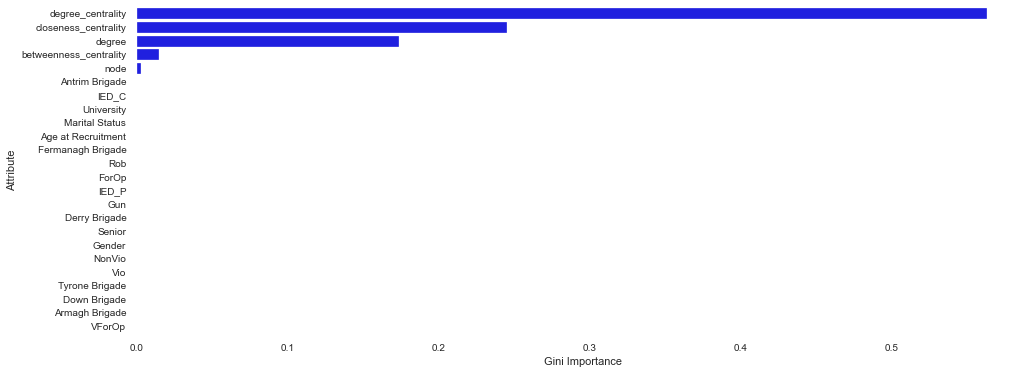

In [553]:
RF = models[0][1]
RF.fit(df_train_X, df_train_Y)

features = {}

for feature, importance in zip(df_train_X.columns, RF.feature_importances_):
    features[feature] = importance

importances = (
    pd.DataFrame.from_dict(features, orient="index")
    .reset_index()
    .rename(columns={"index": "Attribute", 0: "Gini Importance"})
    .sort_values(by="Gini Importance", ascending=False)
)

plt.figure(figsize=(16, 6))
sns.barplot(y="Attribute", x="Gini Importance", data=importances, color="blue")